# Tutorial 05: Homework

### Assignement
  * For the attached data (cleaned data from the 3rd tutorial) try to use linear regression (or ridge regression, if you will) AND decision tree regressor (or boosted tree) applied on features given by PCA.
  * Try to select as less as possible features so that the results are comparably good (in terms of RMSLE) to the results obtained in the 3rd tutorial (RMSLE around 0.12).
  * Experiment with the feature selection:
    * Has removing indicator or discrete features a positive influence?
    * Are the first principal components always the best choice?

In [8]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats, optimize
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# loading data
data = pd.read_csv('dataHW05.csv', index_col=0)

data[data.select_dtypes(['float16', 'float64', 'int64']).columns] = \
data[data.select_dtypes(['float16', 'float64', 'int64']).columns].astype('float64')

# spliting data to train and test datasets
display(data.info())
dtrain, dtest = train_test_split(data, test_size=0.25, random_state=42)
X = dtrain.drop(['SalePrice'], axis = 1, errors = 'ignore')
y = dtrain.SalePrice
Xtest = dtest.drop(['SalePrice'], axis = 1, errors = 'ignore')
ytest = dtest.SalePrice

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 327 entries, Id to SaleCondition_Partial
dtypes: float64(327)
memory usage: 3.7 MB


None

In [3]:
def test(clf, X, y, Xtest, ytest):
    clf.fit(X, y)
    return np.sqrt(mean_squared_error(clf.predict(Xtest), ytest))

In [4]:
print('Root mean squared logarithmic error:', test(LinearRegression(), X, y, Xtest, ytest))

Root mean squared logarithmic error: 0.13215069743365984


In [5]:
print('Root mean squared logarithmic error:', test(DecisionTreeRegressor(), X, y, Xtest, ytest))

Root mean squared logarithmic error: 0.21098401975867542


0.13070640236046638

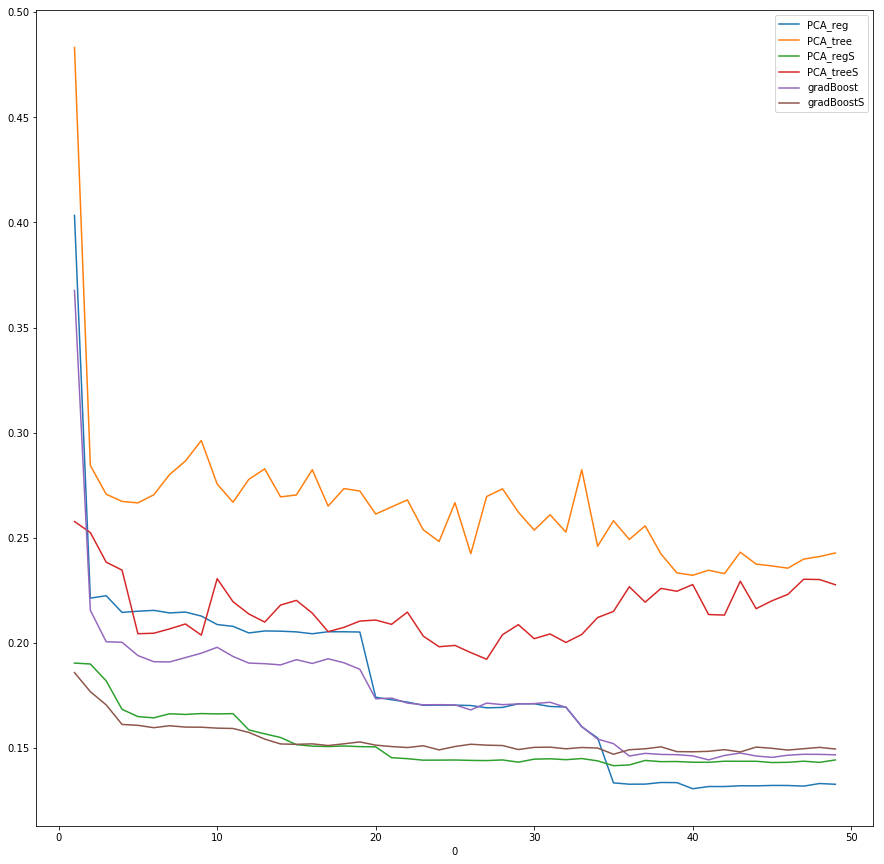

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
q = 50
data = []

minZ = 1


pca = PCA()
pca.fit(X)
_X = pca.transform(X)
_Xtest = pca.transform(Xtest)

pca.fit(scale(X))
_XS = pca.transform(scale(X))
_XtestS = pca.transform(scale(Xtest))

for i in range(1, q):
    Xsub1 = _X[:,0:i]
    Xsubtest1 = _Xtest[:,0:i]
    
    Xsub2 = _XS[:,0:i]
    Xsubtest2 = _XtestS[:,0:i]
    
    linreg = test(LinearRegression(), Xsub1, y, Xsubtest1, ytest)
    tree = test(DecisionTreeRegressor(), Xsub1, y, Xsubtest1, ytest)
    linregScale = test(LinearRegression(), Xsub2, y, Xsubtest2, ytest)
    treeScale = test(DecisionTreeRegressor(), Xsub2, y, Xsubtest2, ytest)
    gradBoost = test(GradientBoostingRegressor(), Xsub1, y, Xsubtest1, ytest)
    gradBoostScale = test(GradientBoostingRegressor(), Xsub2, y, Xsubtest2, ytest)
    if linreg < minZ: minZ = linreg
    if tree < minZ: minZ = tree
    if linregScale < minZ: minZ = linregScale
    if treeScale < minZ: minZ = treeScale
    if gradBoost < minZ: minZ = gradBoost
    if gradBoostScale < minZ: minZ = gradBoostScale
    data.append([i, linreg, tree, linregScale, treeScale, gradBoost, gradBoostScale])
    #print('Root mean squared logarithmic error:', test(LinearRegression(), _X, y, _Xtest, ytest))
    
df = pd.DataFrame(data)
df.set_index(0, inplace=True)
df.columns = ['PCA_reg', 'PCA_tree', 'PCA_regS', 'PCA_treeS', 'gradBoost', 'gradBoostS']
df.head()
df.plot(figsize=(15, 15))
display(minZ)
